In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.utils.eval_utils import eval_setup

In [7]:
os.chdir('/workspace/plane-gs')
MODEL_PATH = "/workspace/plane-gs/outputs/jackal_training_data_5/plane-gs/2024-03-04_170613"

In [8]:
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, checkpoint_path, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

Warning: load_3D_points set to true but no point cloud found. splatfacto will use random point cloud initialization.

[17:06:35] Caching / undistorting train images                                            ]8;id=827354;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=383326;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#182\182]8;;\

Output()

[17:06:38] Caching / undistorting eval images                                             ]8;id=281656;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=67857;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#195\195]8;;\

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_training_data_5/plane-gs/2024-03-04_170613/nerfstudio_models/step-000002999.ckpt

In [9]:
gt_rgb = pipeline.datamanager.train_dataset[0]["image"]

In [10]:
camera = pipeline.datamanager.train_dataset.cameras[0:1].to(pipeline.device)
print(camera)
outputs = pipeline.model.get_outputs(camera=camera)
predicted_rgb = outputs["rgb"]


Cameras(camera_to_worlds=tensor([[[ 1.0000e+00,  3.1789e-09,  3.1814e-09, -1.5895e-09],
         [ 0.0000e+00,  7.0739e-01, -7.0683e-01, -1.0000e+00],
         [-4.4975e-09,  7.0683e-01,  7.0739e-01,  0.0000e+00]]],
       device='cuda:0'), fx=tensor([[1128.5714]], device='cuda:0'), fy=tensor([[1128.5714]], device='cuda:0'), cx=tensor([[640.]], device='cuda:0'), cy=tensor([[360.]], device='cuda:0'), width=tensor([[1280]], device='cuda:0'), height=tensor([[720]], device='cuda:0'), distortion_params=tensor([[0., 0., 0., 0., 0., 0.]], device='cuda:0'), camera_type=tensor([[1]], device='cuda:0'), times=None, metadata={})


torch.Size([720, 1280, 4])
torch.Size([720, 1280, 3])


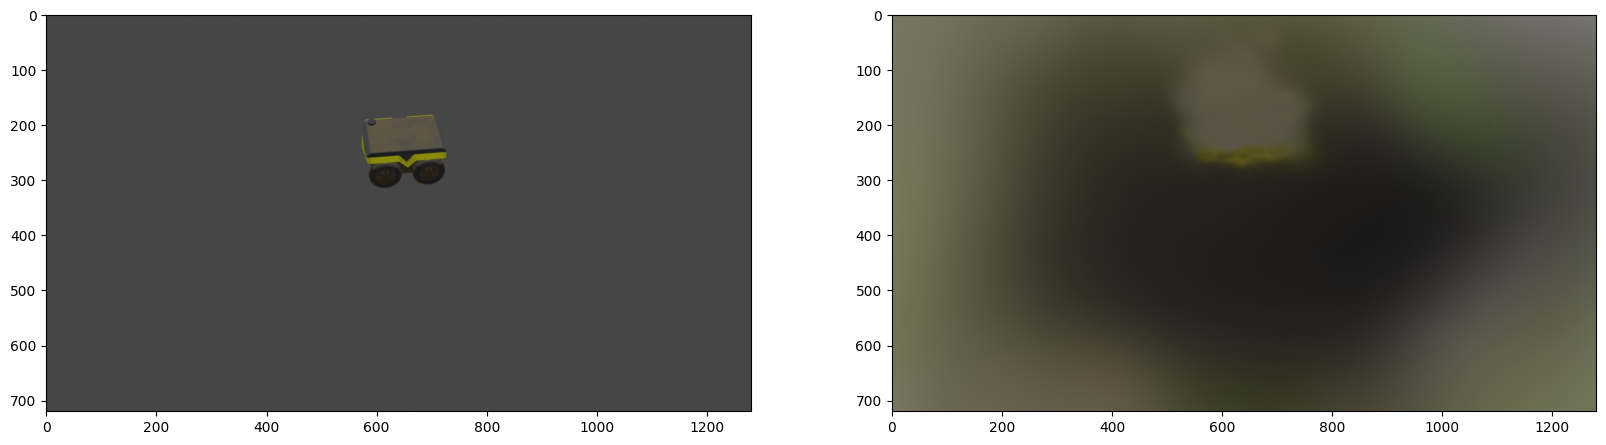

In [11]:
print(gt_rgb.shape)
print(predicted_rgb.shape)

#Plot gt_rgb and predicted_rgb with matplotlib
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb.cpu().numpy())
plt.subplot(1, 2, 2)
plt.imshow(predicted_rgb.detach().cpu().numpy())
plt.show()

In [12]:
print(pipeline.model.camera_optimizer.get_correction_matrices())

tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        ...,

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]]], device='cuda:0', grad_fn=<CopySlices>)


In [13]:
from plane_gs.inerf_trainer import INerfTrainer

trainer = INerfTrainer(config)
trainer.setup()

[17:06:43] Saving checkpoints to:                                                                    ]8;id=689366;file:///workspace/plane-gs/plane_gs/inerf_trainer.py\inerf_trainer.py]8;;\:]8;id=185686;file:///workspace/plane-gs/plane_gs/inerf_trainer.py#49\49]8;;\
           outputs/jackal_training_data_5/plane-gs/2024-03-04_170613/nerfstudio_models                                  

           Auto image downscale factor of 1                                                 ]8;id=999059;file:///home/user/nerfstudio/nerfstudio/data/dataparsers/nerfstudio_dataparser.py\nerfstudio_dataparser.py]8;;\:]8;id=231199;file:///home/user/nerfstudio/nerfstudio/data/dataparsers/nerfstudio_dataparser.py#484\484]8;;\

Warning: load_3D_points set to true but no point cloud found. splatfacto will use random point cloud initialization.

           Caching / undistorting train images                                            ]8;id=11909;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=417458;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#182\182]8;;\

Output()

[17:06:46] Caching / undistorting eval images                                             ]8;id=874539;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=967998;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#195\195]8;;\

Output()

╭─────────────── viser ───────────────╮
│             ╷                       │
│   HTTP      │ http://0.0.0.0:7007   │
│   Websocket │ ws://0.0.0.0:7007     │
│             ╵                       │
╰─────────────────────────────────────╯

[NOTE] Not running eval iterations since only viewer is enabled.
Use --vis {wandb, tensorboard, viewer+wandb, viewer+tensorboard} to run with eval.

Loading latest Nerfstudio checkpoint from load_dir...


Done loading Nerfstudio checkpoint from 
outputs/jackal_training_data_5/plane-gs/2024-03-04_170613/nerfstudio_models/step-000002999.ckpt

Disabled comet/tensorboard/wandb event writers

In [14]:
loss, loss_dict, metrics_dict = trainer.train_iteration(0)
print(loss)
print(loss_dict.keys())
print(metrics_dict.keys())

xyz None
features_dc None
features_rest None
opacity None
scaling None
rotation None
camera_opt tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor(0.0024, device='cuda:0', grad_fn=<AddBackward0>)
dict_keys(['main_loss', 'scale_reg', 'camera_opt_regularizer'])
dict_keys(['psnr', 'gaussian_count', 'camera_opt_translation', 'camera_opt_rotation'])
